# Loan Project - Clustering
***

**Importing the required libraries & packages**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pyodbc
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import pickle
import warnings
warnings.filterwarnings('ignore')

**Changing The Default Working Directory Path**

In [2]:
os.chdir('C:\\Users\\Shridhar\\Desktop\\Loan Project - Clustering')

## Data Reading:

**Processed the input data using Structured Query Language _(SQL)_ and done some cleaning, with the help of <span style = 'color : red'> pyodbc </span> package connecting Jupyter Notebook with SQL Server in the following 3 cells.**

In [3]:
server = 'SHRIDHAR\SQLEXPRESS'
db = 'LoanProject'

In [4]:
conn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+db+';UID=Shri; PWD=12345678;Trusted connection=YES')

In [5]:
sql = 'select * from acc_ord_card_disp_client_dist aocdcd join loan_trans lt on lt.account_id= aocdcd.disposition_account_id'

**Reading the SQL File using Pandas Command**

In [6]:
df = pd.read_sql(sql,conn)

**Exporting the Data after processing in SQL, the final data is converted to Comma Seperated Values _(CSV)_ File**

In [7]:
df.to_csv('Loan Final Data.csv',index = False)

## Exploratory Data Analysis:

**Checking the Null values of all the columns in the dataset.**

In [8]:
df.isna().sum()

card_id                     0
disp_id                     0
type                        0
issued                      0
disposition_account_id      0
disposition_client_id       0
disposition_type            0
client_id                   0
birth_number                0
district_id                 0
A1                          0
A2                          0
A3                          0
A4                          0
A5                          0
A6                          0
A7                          0
A8                          0
A9                          0
A10                         0
A11                         0
A12                         0
A13                         0
A14                         0
A15                         0
A16                         0
order_id                    0
bank_to                     0
account_to                  0
amount                      0
k_symbol                    0
account_date                0
account_district_id         0
account_fr

**Getting to describe the numerical columns of the dataset**

In [9]:
df.describe()

,card_id,disp_id,disposition_account_id,disposition_client_id,client_id,birth_number,district_id,A1,A4,A5,...,account_district_id,trans_id,account_id,amount,balance,account,loan_id,loan_amount,loan_duration,loan_payments
count,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,8.680000e+02,868.000000,...,868.000000,8.680000e+02,868.000000,868.000000,868.000000,2.050000e+02,868.000000,868.000000,868.000000,868.000000
mean,907.690092,8139.987327,6767.154378,8265.955069,8265.955069,685696.934332,37.332949,37.332949,1.407953e+05,41.294931,...,39.427419,2.276811e+06,6767.154378,13533.202650,51020.558765,3.346704e+07,6374.570276,124083.428571,27.069124,4954.557604
std,238.683175,3244.507382,2715.120458,3376.937067,3376.937067,149850.689100,23.864496,23.864496,1.281183e+05,23.132398,...,25.833877,9.593156e+05,2715.120458,15346.995182,28746.846180,3.115044e+07,561.596458,74014.846356,16.620600,2019.525078
min,159.000000,946.000000,790.000000,946.000000,946.000000,351003.000000,1.000000,1.000000,5.131300e+04,0.000000,...,1.000000,2.320620e+05,790.000000,5.400000,200.000000,0.000000e+00,5126.000000,14628.000000,12.000000,1177.000000
25%,844.000000,6567.000000,5442.000000,6567.000000,6567.000000,570929.000000,14.000000,14.000000,8.651300e+04,21.000000,...,12.000000,1.602809e+06,5442.000000,306.224991,31045.900391,7.772154e+06,6112.000000,78939.000000,12.000000,3222.000000
50%,857.000000,6789.000000,5622.000000,6789.000000,6789.000000,780907.000000,32.000000,32.000000,1.050580e+05,34.000000,...,45.000000,1.852832e+06,5622.000000,7000.000000,47310.150391,2.417564e+07,6150.000000,105804.000000,24.000000,4579.000000
75%,1100.000000,11101.000000,9265.000000,11409.000000,11409.000000,790326.000000,57.000000,57.000000,1.619540e+05,65.000000,...,62.000000,3.314625e+06,9265.000000,22933.750000,67505.726562,6.987126e+07,6888.000000,174744.000000,36.000000,6918.000000
max,1223.000000,13231.000000,11013.000000,13539.000000,13539.000000,805502.000000,74.000000,74.000000,1.204953e+06,98.000000,...,74.000000,3.675971e+06,11013.000000,63366.000000,143605.703125,9.867897e+07,7240.000000,331560.000000,60.000000,7281.000000


**Getting the information such as counts, datatypes of all the columns in the dataset**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   card_id                 868 non-null    int64  
 1   disp_id                 868 non-null    int64  
 2   type                    868 non-null    object 
 3   issued                  868 non-null    object 
 4   disposition_account_id  868 non-null    int64  
 5   disposition_client_id   868 non-null    int64  
 6   disposition_type        868 non-null    object 
 7   client_id               868 non-null    int64  
 8   birth_number            868 non-null    int64  
 9   district_id             868 non-null    int64  
 10  A1                      868 non-null    int64  
 11  A2                      868 non-null    object 
 12  A3                      868 non-null    object 
 13  A4                      868 non-null    int64  
 14  A5                      868 non-null    in

**Finding the shape of the dataset**

In [11]:
df.shape

(868, 50)

**Since it has many columns, to extract the columns we need getting all the column names. So, that we can identify the necessary column**

In [12]:
df.columns

Index(['card_id', 'disp_id', 'type', 'issued', 'disposition_account_id',
       'disposition_client_id', 'disposition_type', 'client_id',
       'birth_number', 'district_id', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
       'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'order_id',
       'bank_to', 'account_to', 'amount', 'k_symbol', 'account_date',
       'account_district_id', 'account_frequency', 'trans_id', 'account_id',
       'date', 'type', 'operation', 'amount', 'balance', 'k_symbol', 'bank',
       'account', 'loan_id', 'loan_date', 'loan_amount', 'loan_duration',
       'loan_payments', 'loan_status'],
      dtype='object')

**Assigning the independent variable with only two columns i.e., `loan_amount`, `balance` since it is Clustering Model there's no dependent variable.**

In [13]:
x = df[['loan_amount','balance']]

## Data Preprocessing:

**Standardizing the independent variable of the dataset**

In [14]:
sc = StandardScaler()
sc_x = sc.fit_transform(x)

**Finding the WCSS (Within Cluster Sum of Square) values using KMeans Clustering Model**

In [15]:
wcss = []
for i in range(2,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(sc_x)
    wcss.append(kmeans.inertia_)
display(wcss)

[1073.9739233731984,
 674.3761919126624,
 505.203520237413,
 392.7910556924834,
 303.497549916068,
 265.91492069728133,
 231.3333233347024,
 200.11736383816972,
 170.78818245368387,
 147.35902546079458,
 134.0922580549868,
 117.58543807505731,
 107.3393637939197]

**Plotting the Line Graph with WCSS Values to get the exact ideal number of clusters to be created using KMeans Clustering Algorithm and saving the PNG file of the graph.**

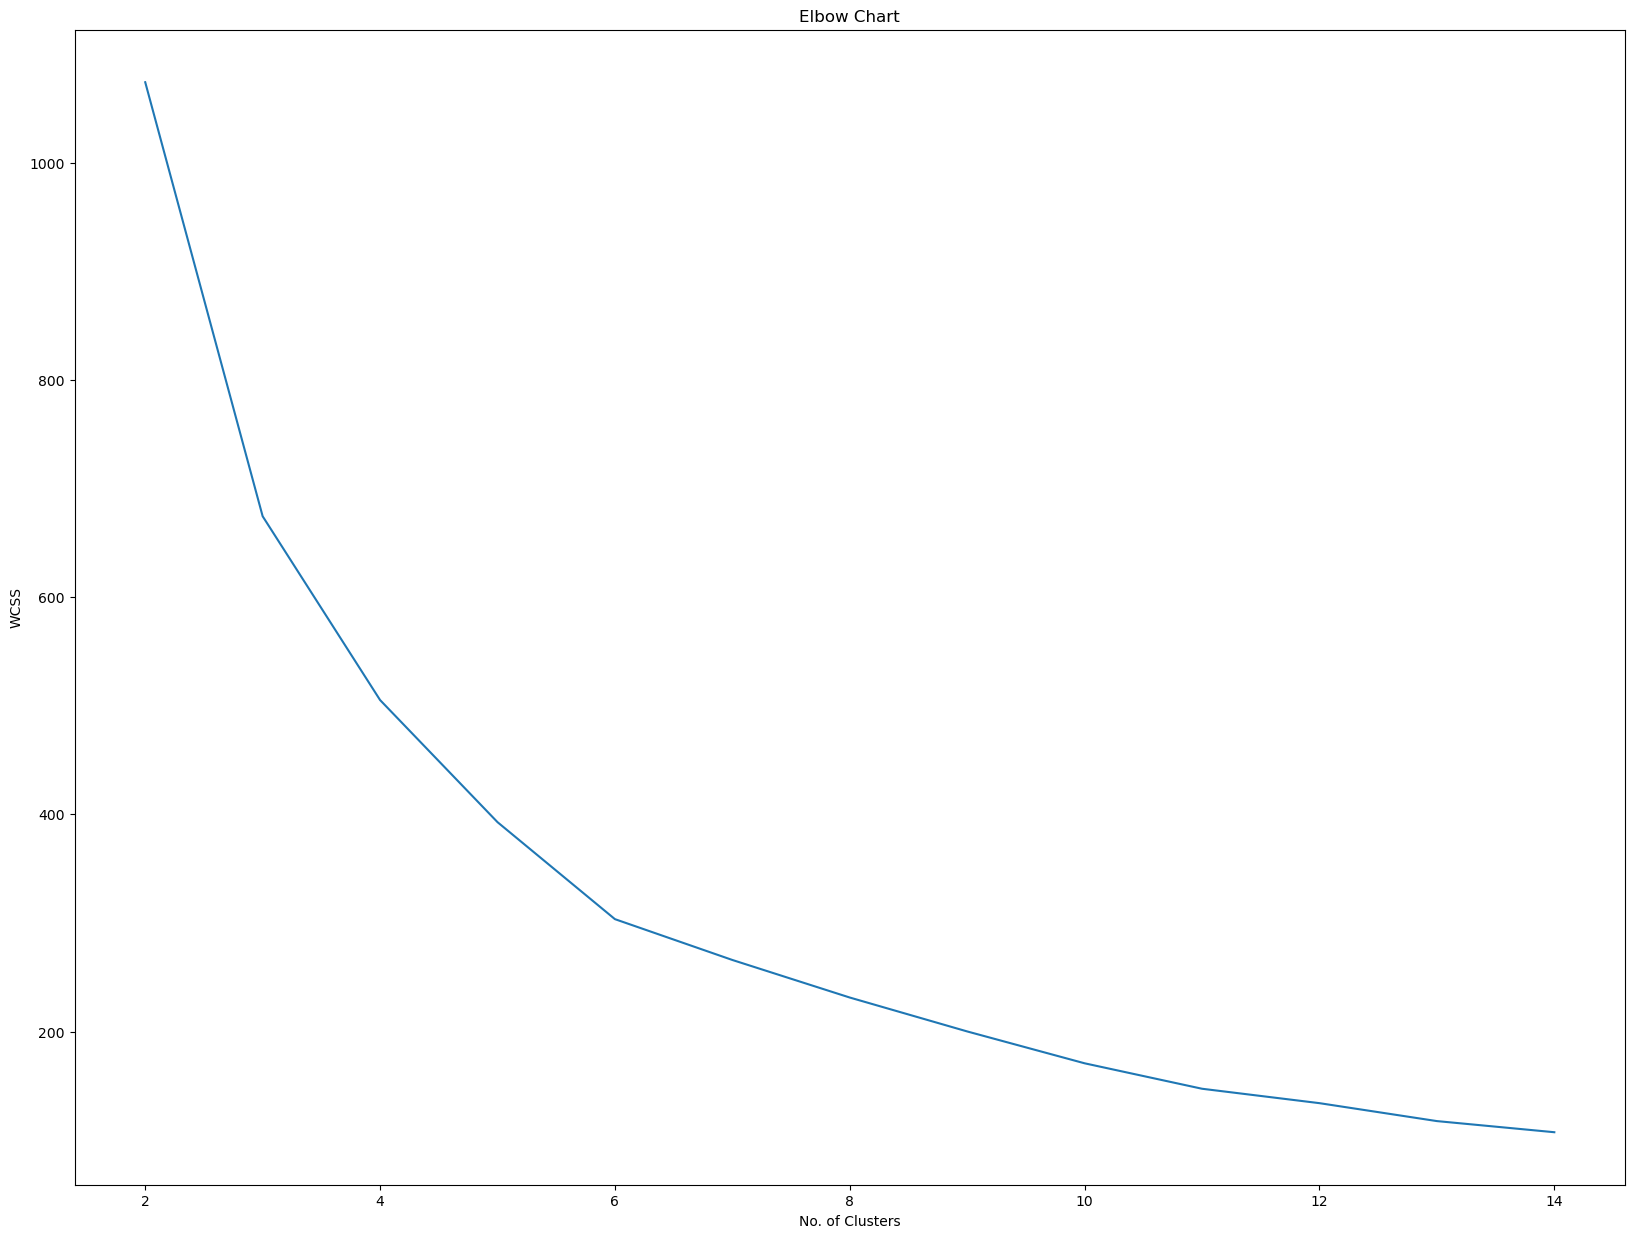

In [16]:
plt.rcParams['figure.figsize'] = 20,15
plt.plot(range(2,15),wcss)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Chart')
plt.savefig('Elbow Chart.png')
plt.show()

**Fitting the KMeans Clustering model with ideal number of clusters found from Elbow Method Graph and getting the dataset belonging to the Cluster.**

In [17]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++')
kmeans = kmeans.fit(sc_x)
y_kmeans = kmeans.labels_

**Plotting the Scatter Plot Graph with the independent variable and the Cluster which it belongs and saving the PNG file.**

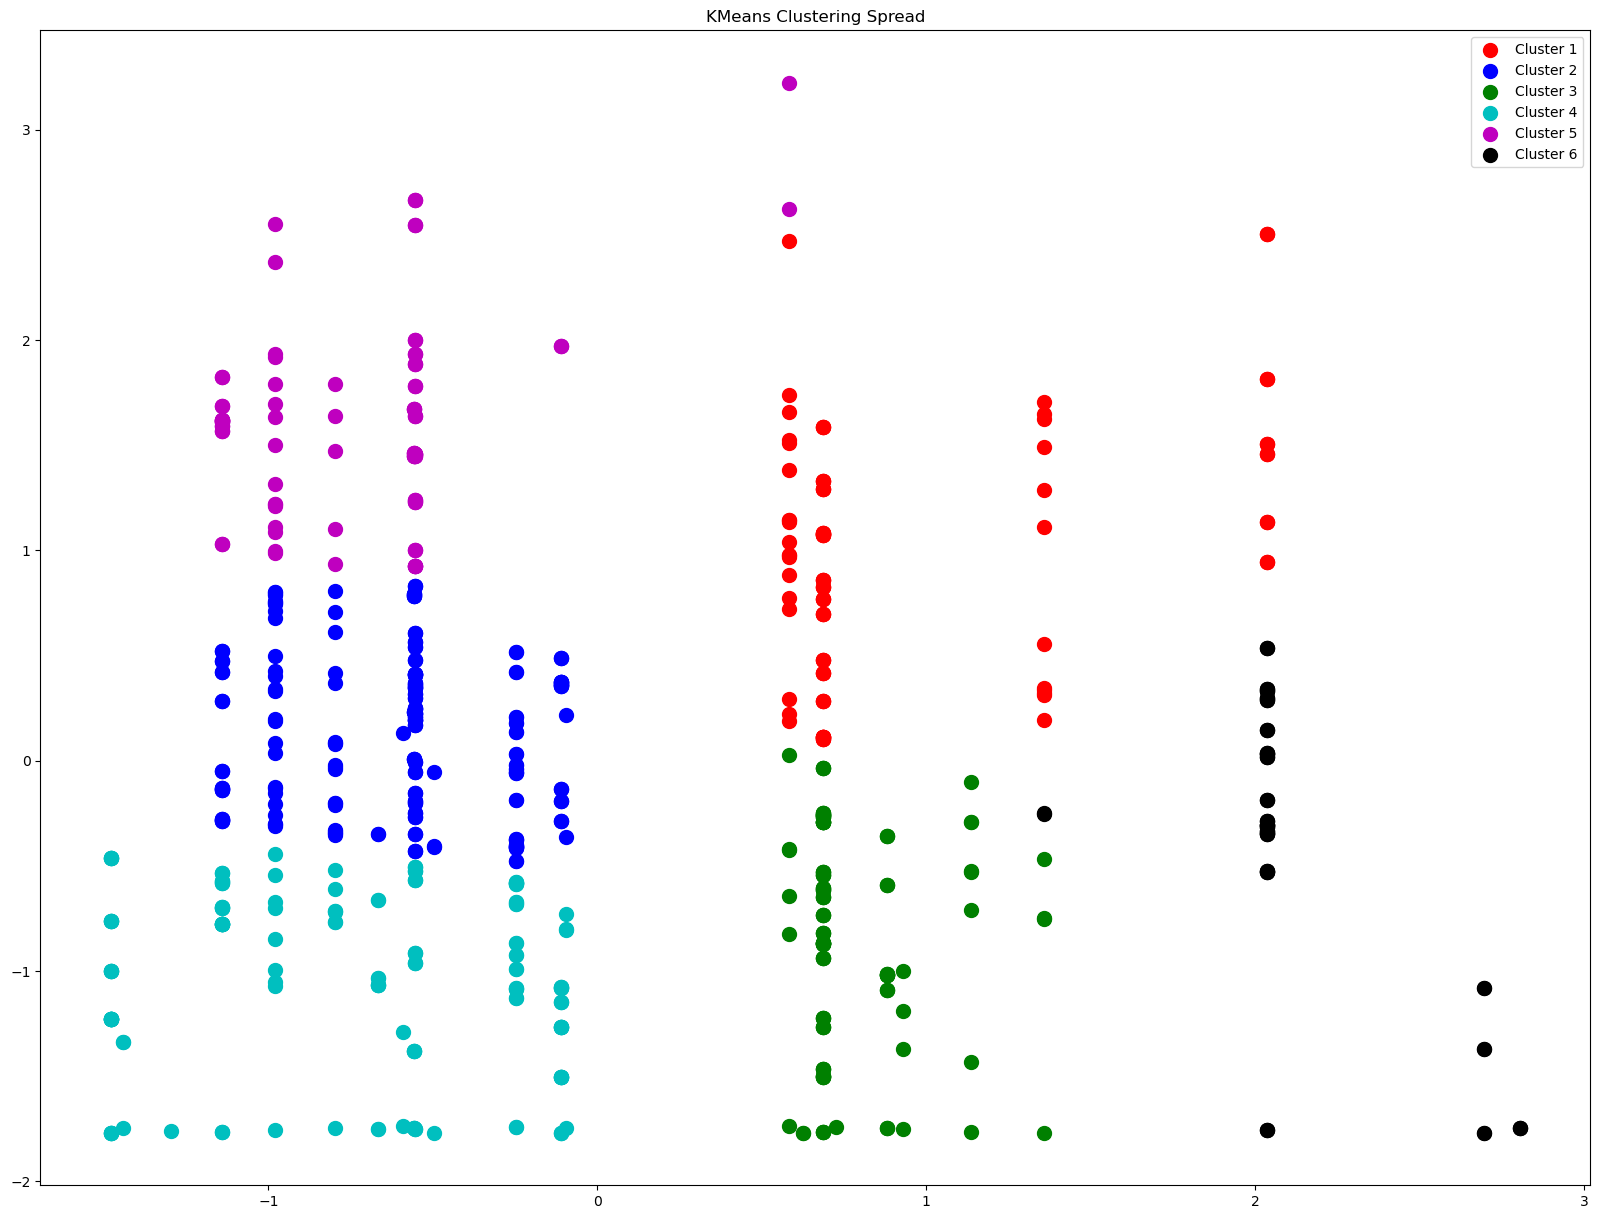

In [18]:
plt.scatter(sc_x[y_kmeans==0,0],sc_x[y_kmeans==0,1],s=100,c='r',label='Cluster 1')
plt.scatter(sc_x[y_kmeans==1,0],sc_x[y_kmeans==1,1],s=100,c='b',label='Cluster 2')
plt.scatter(sc_x[y_kmeans==2,0],sc_x[y_kmeans==2,1],s=100,c='g',label='Cluster 3')
plt.scatter(sc_x[y_kmeans==3,0],sc_x[y_kmeans==3,1],s=100,c='c',label='Cluster 4')
plt.scatter(sc_x[y_kmeans==4,0],sc_x[y_kmeans==4,1],s=100,c='m',label='Cluster 5')
plt.scatter(sc_x[y_kmeans==5,0],sc_x[y_kmeans==5,1],s=100,c='k',label='Cluster 6')
plt.title('KMeans Clustering Spread')
plt.savefig('KMeans Clustering Spread.png')
plt.legend()
plt.show()

**Merging the Cluster Number, adding the sepearte column for it, also getting the `account_id` column from the dataset with assigned independent variable and Adding new column names for the existing columns of the resultant dataset  such as `Account ID`, `Loan Amount`, `Balance`, `Cluster Number` . Displaying the resulting dataset**

In [19]:
result = pd.concat([df.iloc[:,4], pd.DataFrame(x),pd.DataFrame(y_kmeans)],axis = 1)
result.columns = ['Account ID', 'Loan Amount', 'Balance', 'Cluster Number']
display(result)

,Account ID,Loan Amount,Balance,Cluster Number
0,790,208128,30674.599609,2
1,790,208128,300.000000,2
2,790,208128,9900.000000,2
3,790,208128,42599.000000,2
4,790,208128,42658.199219,2
...,...,...,...,...
863,11013,274740,42844.000000,5
864,11013,274740,35844.000000,5
865,11013,274740,35921.101562,5
866,11013,274740,78165.101562,0


**From the resulting dataset , found that the `Balance` column is Currency value but the readability is much worse since it has many figures after the decimal point. So, rounding off the `Balance` column and updating the rounded value to the `Balance` column in the independent variable and displaying the independent variable after updating.** 

In [20]:
rounded_balance = round(x['balance'],2)
x.update({'balance': rounded_balance})
display(x)

,loan_amount,balance
0,208128,30674.6
1,208128,300.0
2,208128,9900.0
3,208128,42599.0
4,208128,42658.2
...,...,...
863,274740,42844.0
864,274740,35844.0
865,274740,35921.1
866,274740,78165.1


**Now again merging the columns just as like before, with updated column names as `Account ID`, `Loan Amount ($)`, `Balance ($)`, `Cluster Number` since we updated the independent variable the readability of all the columns is pretty good**

In [21]:
result = pd.concat([df.iloc[:,4], pd.DataFrame(x),pd.DataFrame(y_kmeans)],axis = 1)
result.columns = ['Account ID', 'Loan Amount ($)', 'Balance ($)', 'Cluster Number']
display(result)

,Account ID,Loan Amount ($),Balance ($),Cluster Number
0,790,208128,30674.6,2
1,790,208128,300.0,2
2,790,208128,9900.0,2
3,790,208128,42599.0,2
4,790,208128,42658.2,2
...,...,...,...,...
863,11013,274740,42844.0,5
864,11013,274740,35844.0,5
865,11013,274740,35921.1,5
866,11013,274740,78165.1,0


**Grouping by the Cluster Number with respect to `Loan Amount ($)` and `Balance ($)` to get the Minimum, Maximum values of Loan Amount, Balance and the number of values in each Clusters.**

In [22]:
result.groupby('Cluster Number').agg({'Loan Amount ($)':[np.min,np.max],'Balance ($)':[np.min,np.max,np.size]})

Loan Amount ($)         Balance ($)               
                          amin    amax        amin      amax size
Cluster Number                                                   
0                       167100  274740     53973.8  122893.1  113
1                        39576  117024     37262.7   74831.8  261
2                       167100  224604       200.0   51819.7  142
3                        14628  117024       200.0   38231.6  171
4                        39576  167100     77560.3  143605.7  110
5                       224604  331560       200.0   66391.9   71

**Loading the pickle file with K-Means Clustering model**

In [23]:
pickle.dump(kmeans,open('KMeans.pkl','wb'))